## Hiring Task - ML
## iGnosis Tech

In [1]:
import numpy as np
import pandas as pd

In [5]:
df_transaction = pd.read_csv(r"C:\Users\devan\Downloads\transaction_data.csv")
df_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [6]:
df_purchase = pd.read_csv(r"C:\Users\devan\Downloads\purchase_behaviour.csv")
df_purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [7]:
# merging two data set
df = pd.merge(df_transaction, df_purchase, on="LYLTY_CARD_NBR" ,how= "inner" )

In [9]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,43533,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [10]:
df.info

<bound method DataFrame.info of          DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0       43390          1            1000       1         5   
1       43599          1            1307     348        66   
2       43414          1            1307     346        96   
3       43533          1            1307     347        54   
4       43605          1            1343     383        61   
...       ...        ...             ...     ...       ...   
264831  43533        272          272319  270088        89   
264832  43325        272          272358  270154        74   
264833  43410        272          272379  270187        51   
264834  43461        272          272379  270188        42   
264835  43365        272          272380  270189        74   

                                      PROD_NAME  PROD_QTY  TOT_SALES  \
0        Natural Chip        Compny SeaSalt175g         2        6.0   
1                      CCs Nacho Cheese    175g         3        6.3   
2      

In [11]:
df.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')

**Findind most profitable products**

In [14]:
top_prods = df.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()
top_prods = top_prods.sort_values(by='TOT_SALES' , ascending=False)
Most_profitable_prods = top_prods.head(3)
Most_profitable_prods

,PROD_NAME,TOT_SALES
11,Dorito Corn Chp Supreme 380g,40352.0
86,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
77,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2


C:\Users\devan\AppData\Local\Temp\ipykernel_17748\3474142223.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="PROD_NAME", y="TOT_SALES", data=Most_profitable_prods,palette= "viridis")


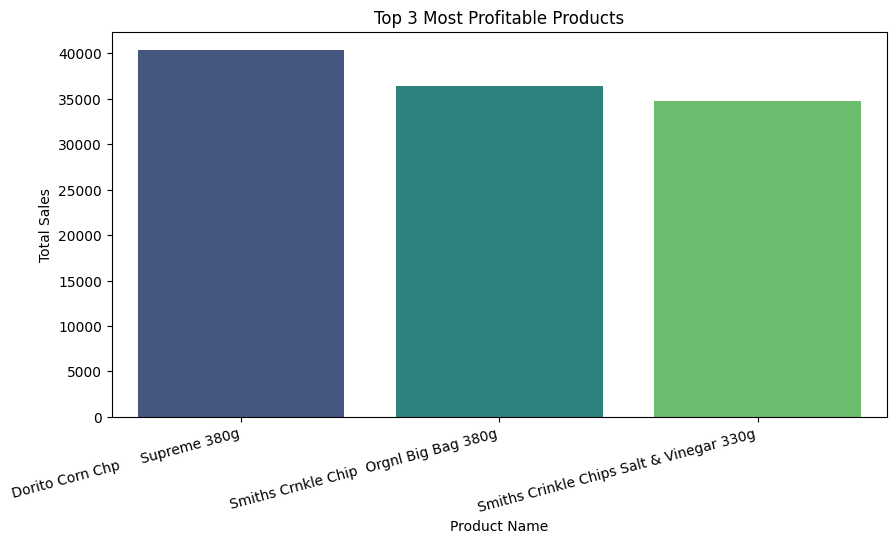

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(x="PROD_NAME", y="TOT_SALES", data=Most_profitable_prods,palette= "viridis")
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.title("Top 3 Most Profitable Products")
plt.xticks(rotation=15, ha="right")
plt.show;

**characteristics of our most loyal customers**

In [25]:
# here we are going to check average number of purchases per customer(frequency of purchase). Higher the value, customers will be more loyal
purchase_frequency = df.groupby("LYLTY_CARD_NBR")["TXN_ID"].count().reset_index()
purchase_frequency.rename(columns={"TXN_ID": "purchase_count"}, inplace=True)
purchase_frequency = purchase_frequency.merge(
    df[["LYLTY_CARD_NBR", "LIFESTAGE", "PREMIUM_CUSTOMER"]].drop_duplicates(),
    on="LYLTY_CARD_NBR",
    how="left")

loyal_cust = purchase_frequency.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["purchase_count"].mean().reset_index()
loyal_cust 

,LIFESTAGE,PREMIUM_CUSTOMER,purchase_count
0,MIDAGE SINGLES/COUPLES,Budget,3.337766
1,MIDAGE SINGLES/COUPLES,Mainstream,3.555090
2,MIDAGE SINGLES/COUPLES,Premium,3.379679
3,NEW FAMILIES,Budget,2.702338
4,NEW FAMILIES,Mainstream,2.738516
5,NEW FAMILIES,Premium,2.702381
6,OLDER FAMILIES,Budget,4.954011
7,OLDER FAMILIES,Mainstream,5.031438
8,OLDER FAMILIES,Premium,4.921724
9,OLDER SINGLES/COUPLES,Budget,3.734429


Both young and older family purchase more frequenty so they are the loyal customers.

**Summary**

Top 3 most profitable products are , Dorito Corn Chips Supreme 380g ,Smiths Crinkle Chip Original Big Bag 380g and Smiths Crinkle Chips Salt & Vinegar 330g  respectively. 

Loyal customer charcters are Families (Older and Young).